In [1]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.gam import gam
from algorithms.lv_hba import lv_hba
from algorithms.ours import ours

from utils import *

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams['axes.unicode_minus']=False

In [4]:
epochs = 80
seeds = 10

In [5]:
hparams = {
    'lv_hba': {
        'alpha': 0.01,
        'gama1': 0.1,
        'gama2': 0.1,
        'yita': 0.001
    },
    'gam': {
        'alpha': 0.05,
        'epsilon': 0.005
    },
    'ours': {
        'gam': 12.,
        'eta': 0.01,
        'T': 20,
        'Ty': 20,
        'eta1g': 0.001,
        'eta1F': 0.00001,
        'eta2g': 0.0001,
        'eta2F': 0.0001
    }
}

# Dataset Diabetes

In [24]:
dataset_name = "diabetes"
data = load_diabetes()

n_train = 500
n_val = 150

In [25]:
metrics_diabetes = {}
variables_diabetes = {}

algs = ['ours', 'lv_hba', 'gam']
#algs = ['ours']

for a in algs:
    metrics_diabetes[a] = []
    variables_diabetes[a] = []

for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics_diabetes[alg].append(metrics_seed)
        variables_diabetes[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: ours lv_hba gam DONE
Starting seed 2/10: ours lv_hba gam DONE
Starting seed 3/10: ours lv_hba gam DONE
Starting seed 4/10: ours lv_hba gam DONE
Starting seed 5/10: ours lv_hba gam DONE
Starting seed 6/10: ours lv_hba gam DONE
Starting seed 7/10: ours lv_hba gam DONE
Starting seed 8/10: ours lv_hba gam DONE
Starting seed 9/10: ours lv_hba gam DONE
Starting seed 10/10: ours lv_hba gam DONE


## Evaluation

In [26]:
results_path = ''

#f'../results/hyperparam_opt/{dataset_name}/'

In [27]:
metrics_lvhba = metrics_diabetes['lv_hba']
metrics_gam = metrics_diabetes['gam']
metrics_ours = metrics_diabetes['ours']

axis_lvhba = np.array([[x['time_computation'] for x in metric] for metric in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metric] for metric in metrics_gam]).mean(0)
axis_ours = np.array([[x['time_computation'] for x in metric] for metric in metrics_ours]).mean(0)

axis_iter = np.arange(epochs)

In [28]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metric] for metric in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metric] for metric in metrics_gam])
train_acc_ours = np.array([[x['train_acc_F'] for x in metric] for metric in metrics_ours])

val_acc_lvhba = np.array([[x['val_acc'] for x in metric] for metric in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metric] for metric in metrics_gam])
val_acc_ours = np.array([[x['val_acc_F'] for x in metric] for metric in metrics_ours])

test_acc_lvhba = np.array([[x['test_acc'] for x in metric] for metric in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metric] for metric in metrics_gam])
test_acc_ours = np.array([[x['test_acc_F'] for x in metric] for metric in metrics_ours])

In [29]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
val_loss_ga = np.array([[x['val_loss'] for x in metric] for metric in metrics_gam])[:,0:]
val_loss_ours = np.array([[x['val_loss_F'] for x in metric] for metric in metrics_ours])[:,0:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metric] for metric in metrics_lvhba])[:,0:]
test_loss_ga = np.array([[x['test_loss'] for x in metric] for metric in metrics_gam])[:,0:]
test_loss_ours = np.array([[x['test_loss_F'] for x in metric] for metric in metrics_ours])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metric] for metric in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metric] for metric in metrics_gam])[:,1:]
lower_loss_ours = np.array([[x['loss_lower'] for x in metric] for metric in metrics_ours])[:,1:]

# constraint_violation_lvhba = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_lvhba])[:,1:]
# constraint_violation_ours = np.array([[x['constraint_violation'] for x in metric] for metric in metrics_ours])[:,1:]

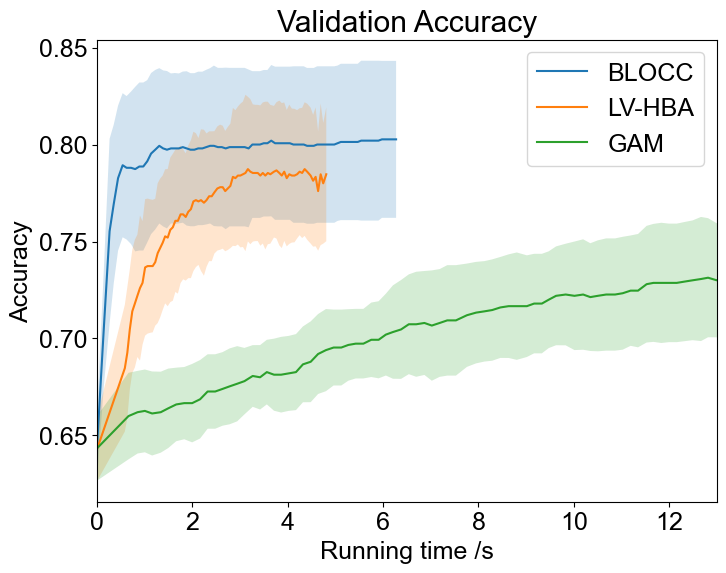

In [30]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0,13])
plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

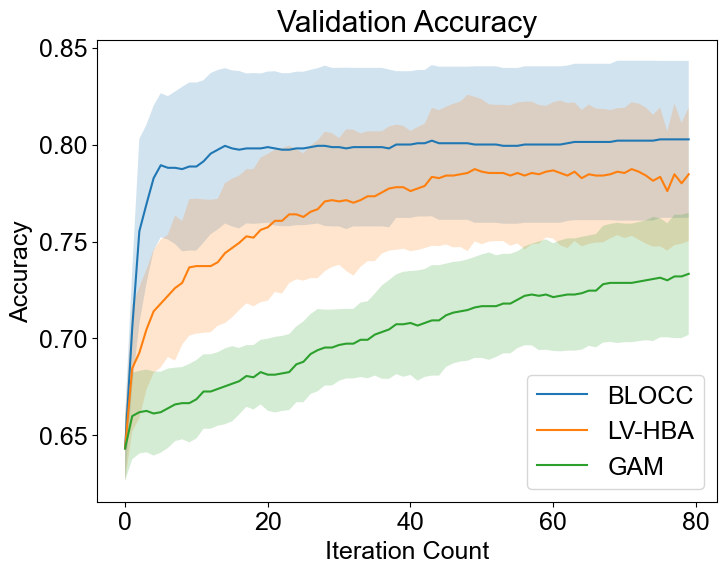

In [31]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")


plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

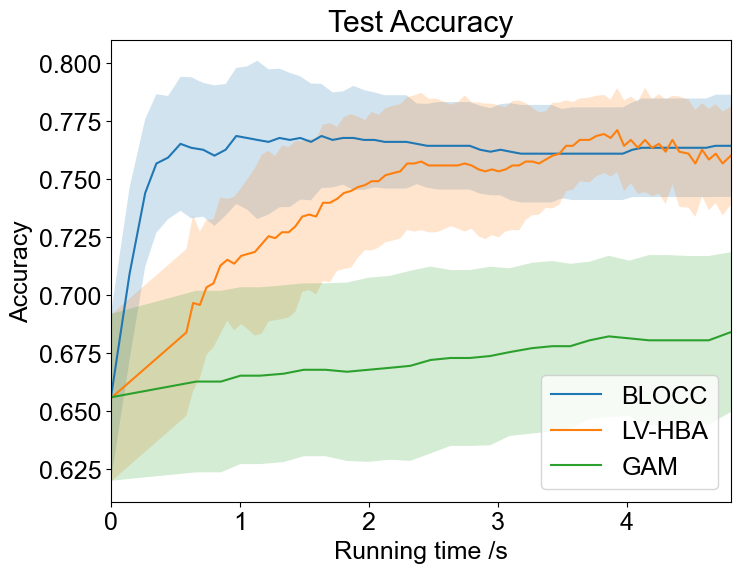

In [32]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0,axis_lvhba.max()])
plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

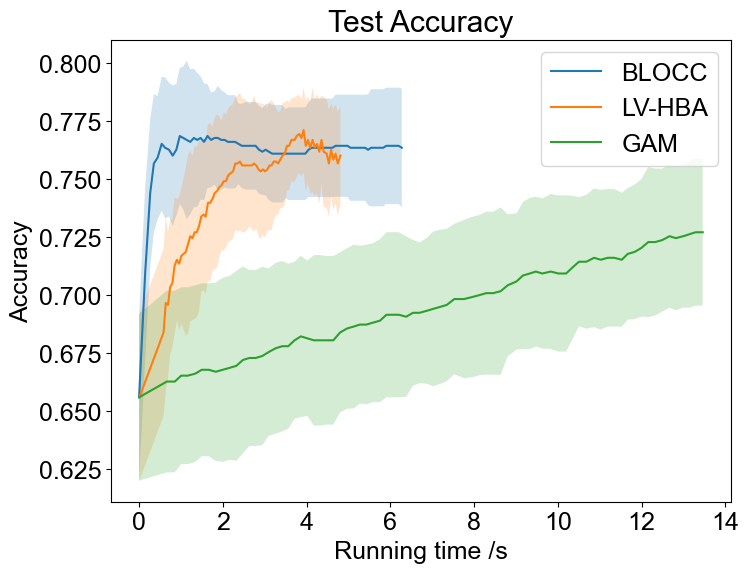

In [33]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")


plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

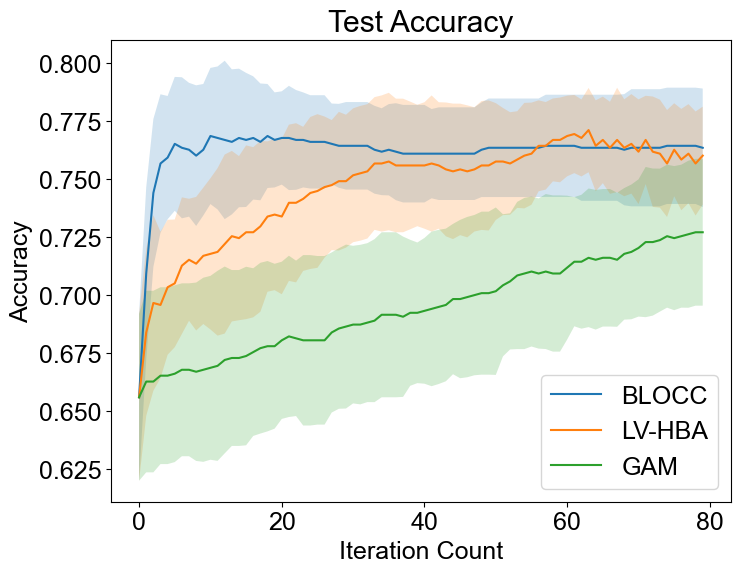

In [34]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + 'test_accuracy_iteration.pdf', bbox_inches="tight")

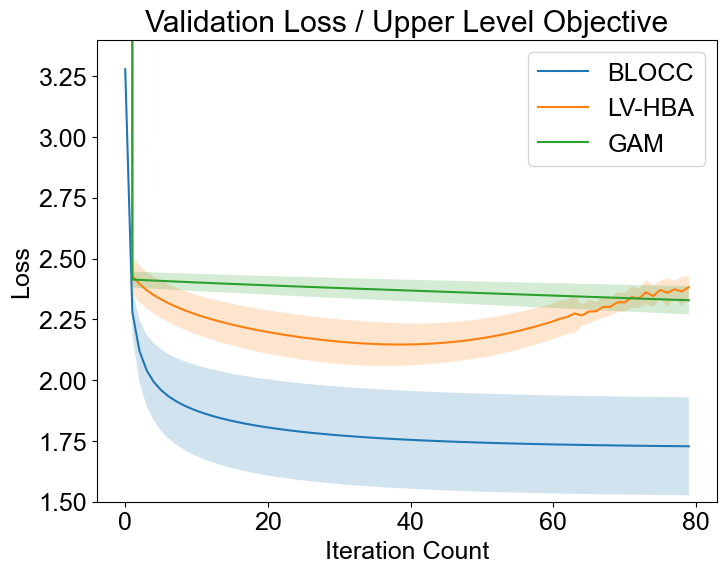

In [35]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

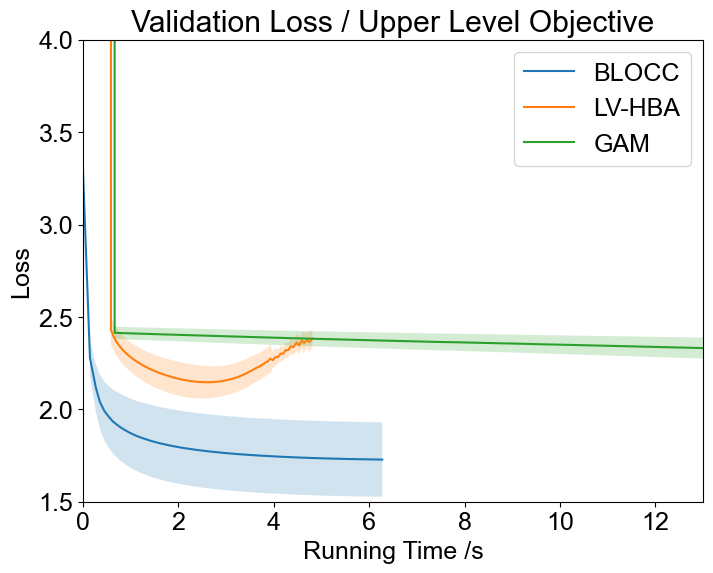

In [36]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(axis_ours[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

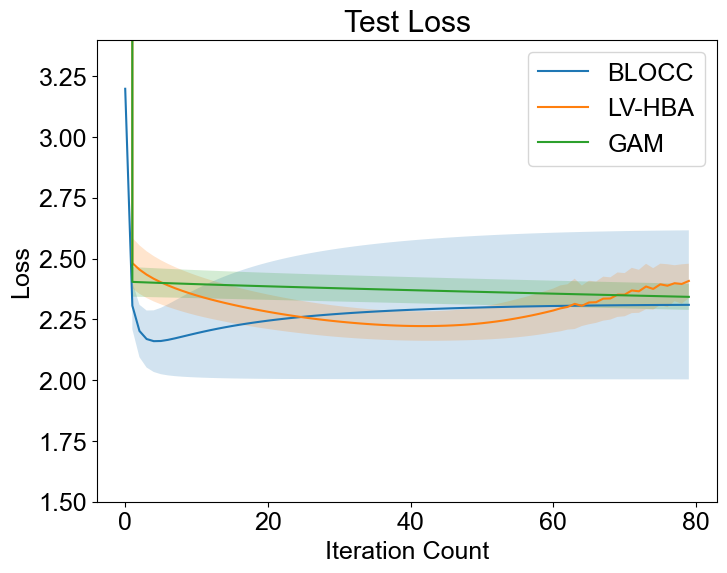

In [37]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = test_loss_ours.mean(0)-test_loss_ours.std(0)
fill_up_ours = test_loss_ours.mean(0)+test_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_ga.mean(0)-test_loss_ga.std(0)
fill_dn_GAM = test_loss_ga.mean(0)+test_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

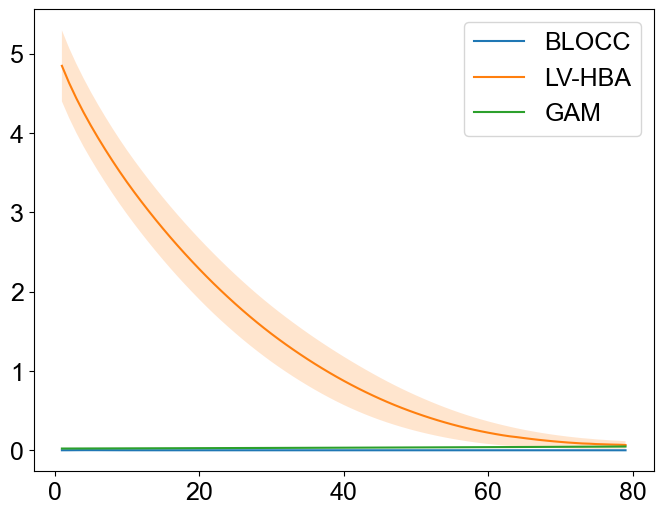

In [38]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = lower_loss_ours.mean(0)-lower_loss_ours.std(0)
fill_up_ours = lower_loss_ours.mean(0)+lower_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
# plt.title('Lower Loss')
# plt.xlabel('Iteration Count')
# plt.ylabel("Loss")

plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

In [21]:
# plt.figure(figsize=(8,6))

# plt.plot(iter_axis[1:],constraint_violation_ours.mean(0),'-',label="BLOCC")
# # fill_dn_ours = constraint_violation_ours.mean(0)-constraint_violation_ours.std(0)
# # fill_up_ours = constraint_violation_ours.mean(0)+constraint_violation_ours.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

# plt.plot(iter_axis[1:],constraint_violation_lvhba.mean(0),'-',label="LV-HBA")
# # fill_dn_LV = constraint_violation_lvhba.mean(0)-constraint_violation_lvhba.std(0)
# # fill_up_LV = constraint_violation_lvhba.mean(0)+constraint_violation_lvhba.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

# plt.legend()
# # plt.title('Lower Loss')
# # plt.xlabel('Iteration Count')
# # plt.ylabel("Loss")

# plt.savefig(results_path+'constraint_violation.pdf', bbox_inches="tight")

# Dataset Fourclass

In [41]:
dataset_name = "fourclass"
data = load_fourclass()

n_train = 500
n_val = 150

In [42]:
metrics_fourclass = {}
variables_fourclass = {}

algs = ['ours', 'lv_hba', 'gam']

for a in algs:
    metrics_fourclass[a] = []
    variables_fourclass[a] = []

for seed in range(seeds):

    print(f"Starting seed {seed+1}/{seeds}: ", end="")

    x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

    for alg in algs:
        print(f"{alg}", end=" ")

        metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, verbose=False)
        metrics_fourclass[alg].append(metrics_seed)
        variables_fourclass[alg].append(variables_seed)
    print("DONE")

Starting seed 1/10: ours lv_hba gam DONE
Starting seed 2/10: ours lv_hba gam DONE
Starting seed 3/10: ours lv_hba gam DONE
Starting seed 4/10: ours lv_hba gam DONE
Starting seed 5/10: ours lv_hba gam DONE
Starting seed 6/10: ours lv_hba gam DONE
Starting seed 7/10: ours lv_hba gam DONE
Starting seed 8/10: ours lv_hba gam DONE
Starting seed 9/10: ours lv_hba gam DONE
Starting seed 10/10: ours lv_hba gam DONE


## Evaluation

In [43]:
results_path = 'fourclass/'#f'../results/hyperparam_opt/{dataset_name}/'

In [44]:
metrics_lvhba = metrics_fourclass['lv_hba']
metrics_gam = metrics_fourclass['gam']
metrics_ours = metrics_fourclass['ours']

axis_lvhba = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_lvhba]).mean(0)
axis_gam = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_gam]).mean(0)
axis_ours = np.array([[x['time_computation'] for x in metrics] for metrics in metrics_ours]).mean(0)

axis_iter = np.arange(epochs)

In [45]:
train_acc_lvhba = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_lvhba])
train_acc_ga = np.array([[x['train_acc'] for x in metrics] for metrics in metrics_gam])
train_acc_ours = np.array([[x['train_acc_F'] for x in metrics] for metrics in metrics_ours])

val_acc_lvhba = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_lvhba])
val_acc_ga = np.array([[x['val_acc'] for x in metrics] for metrics in metrics_gam])
val_acc_ours = np.array([[x['val_acc_F'] for x in metrics] for metrics in metrics_ours])

test_acc_lvhba = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_lvhba])
test_acc_ga = np.array([[x['test_acc'] for x in metrics] for metrics in metrics_gam])
test_acc_ours = np.array([[x['test_acc_F'] for x in metrics] for metrics in metrics_ours])

In [46]:
val_loss_lvhba = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
val_loss_ga = np.array([[x['val_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
val_loss_ours = np.array([[x['val_loss_F'] for x in metrics] for metrics in metrics_ours])[:,0:]

test_loss_lvhba = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_lvhba])[:,0:]
test_loss_ga = np.array([[x['test_loss'] for x in metrics] for metrics in metrics_gam])[:,0:]
test_loss_ours = np.array([[x['test_loss_F'] for x in metrics] for metrics in metrics_ours])[:,0:]

lower_loss_lvhba = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
lower_loss_ga = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_gam])[:,1:]
lower_loss_ours = np.array([[x['loss_lower'] for x in metrics] for metrics in metrics_ours])[:,1:]

# constraint_violation_lvhba = np.array([[x['constraint_violation'] for x in metrics] for metrics in metrics_lvhba])[:,1:]
# constraint_violation_ours = np.array([[x['constraint_violation'] for x in metrics] for metrics in metrics_ours])[:,1:]

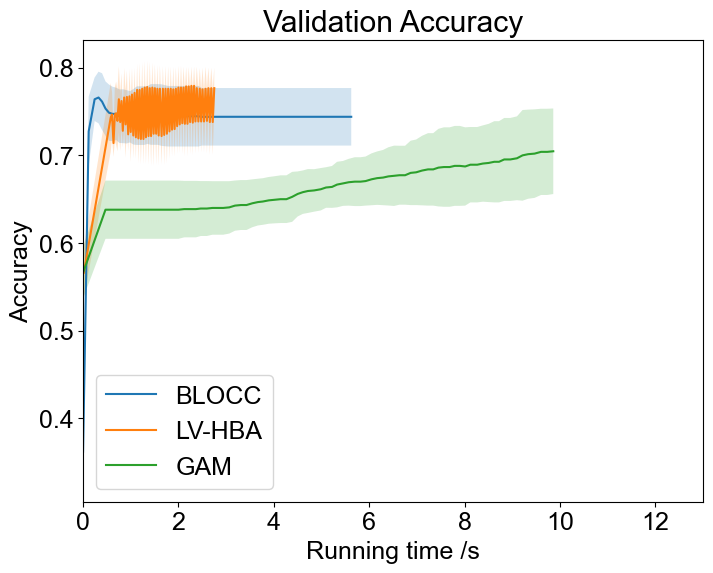

In [47]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_lvhba,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)


plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")
plt.xlim([0,13])
plt.savefig(results_path + 'val_accuracy_running_time.pdf', bbox_inches="tight")

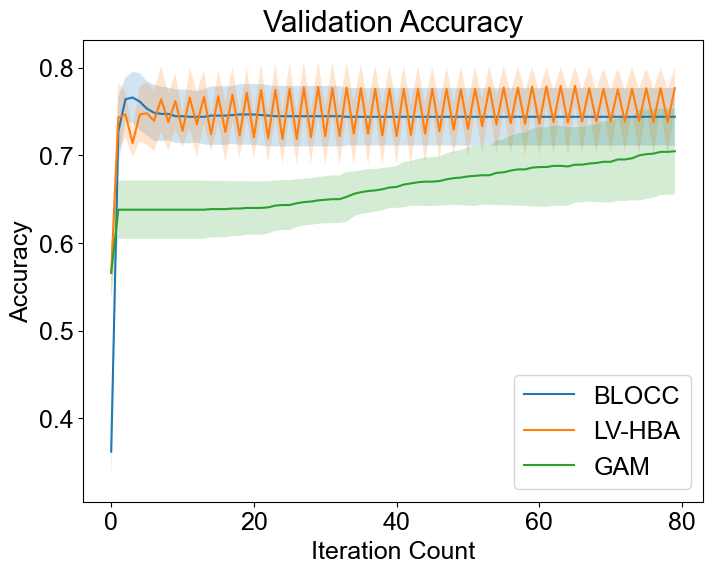

In [48]:
plt.figure(figsize=(8,6))

iter_axis = np.arange(val_acc_ga.shape[1])

plt.plot(axis_iter,val_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,val_acc_ours.mean(0)-val_acc_ours.std(0),val_acc_ours.mean(0)+val_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,val_acc_lvhba.mean(0)-val_acc_lvhba.std(0),val_acc_lvhba.mean(0)+val_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,val_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,val_acc_ga.mean(0)-val_acc_ga.std(0),val_acc_ga.mean(0)+val_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Validation Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")


plt.savefig(results_path + 'val_accuracy_iteration.pdf', bbox_inches="tight")

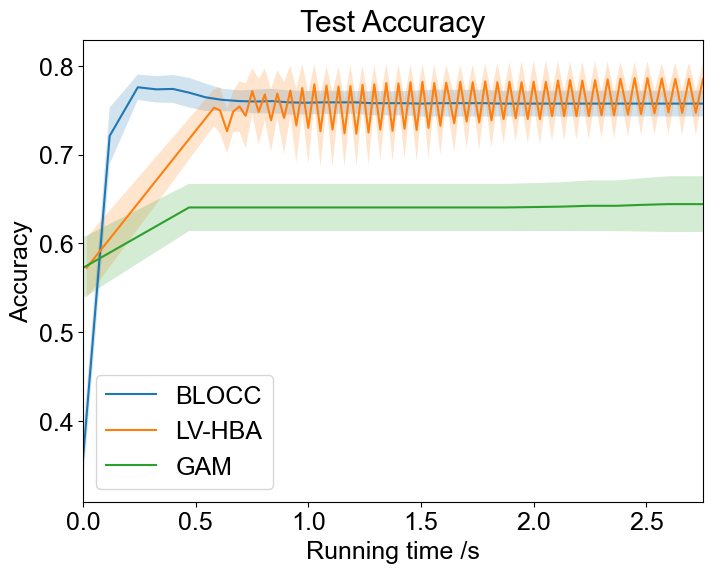

In [49]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.xlim([0,axis_lvhba.max()])
plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

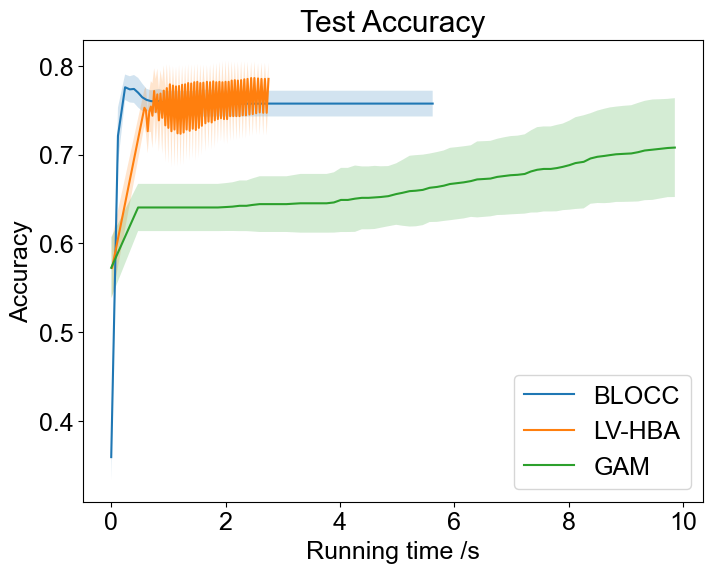

In [50]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_ours,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)


plt.plot(axis_lvhba,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_lvhba,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_gam,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_gam,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Running time /s')
plt.ylabel("Accuracy")

plt.savefig(results_path + 'test_accuracy_running_time.pdf', bbox_inches="tight")

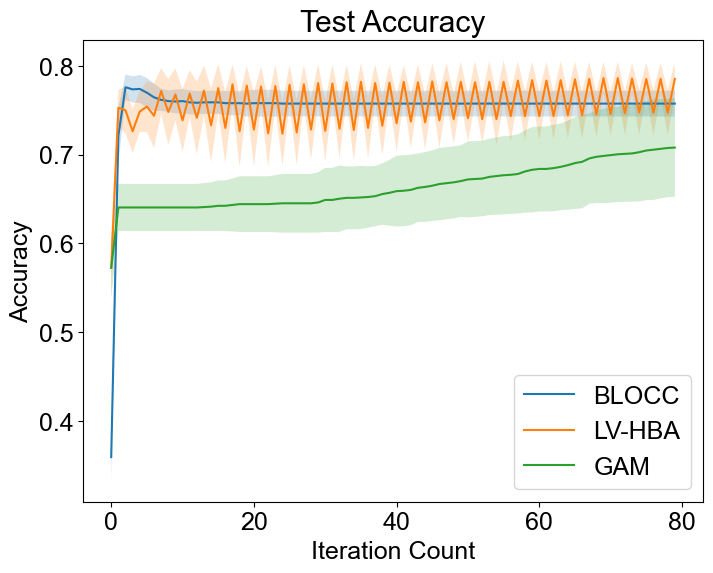

In [51]:
plt.figure(figsize=(8,6))

plt.plot(axis_iter,test_acc_ours.mean(0),'-',label="BLOCC")
plt.fill_between(axis_iter,test_acc_ours.mean(0)-test_acc_ours.std(0),test_acc_ours.mean(0)+test_acc_ours.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_lvhba.mean(0),'-',label="LV-HBA")
plt.fill_between(axis_iter,test_acc_lvhba.mean(0)-test_acc_lvhba.std(0),test_acc_lvhba.mean(0)+test_acc_lvhba.std(0),alpha=0.2)

plt.plot(axis_iter,test_acc_ga.mean(0),'-',label="GAM")
plt.fill_between(axis_iter,test_acc_ga.mean(0)-test_acc_ga.std(0),test_acc_ga.mean(0)+test_acc_ga.std(0),alpha=0.2)

plt.legend()
plt.title('Test Accuracy')
plt.xlabel('Iteration Count')
plt.ylabel("Accuracy")
plt.savefig(results_path + 'test_accuracy_iteration.pdf', bbox_inches="tight")

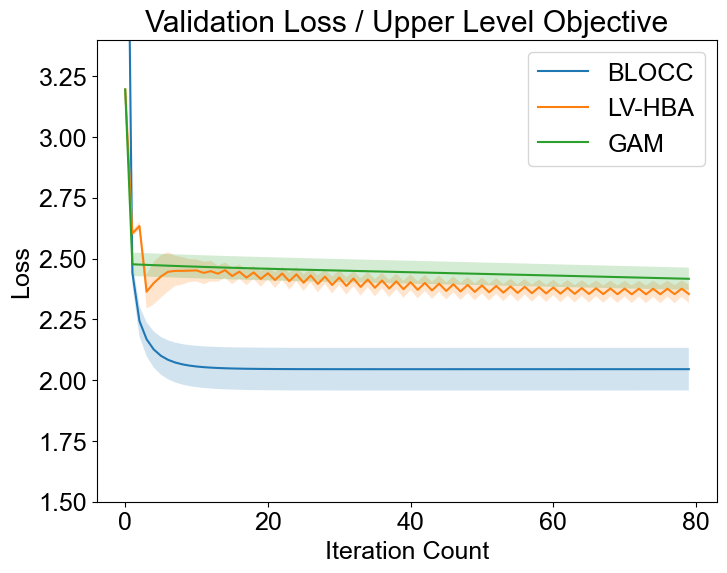

In [52]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,val_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'upper_obj_iteration.pdf', bbox_inches="tight")

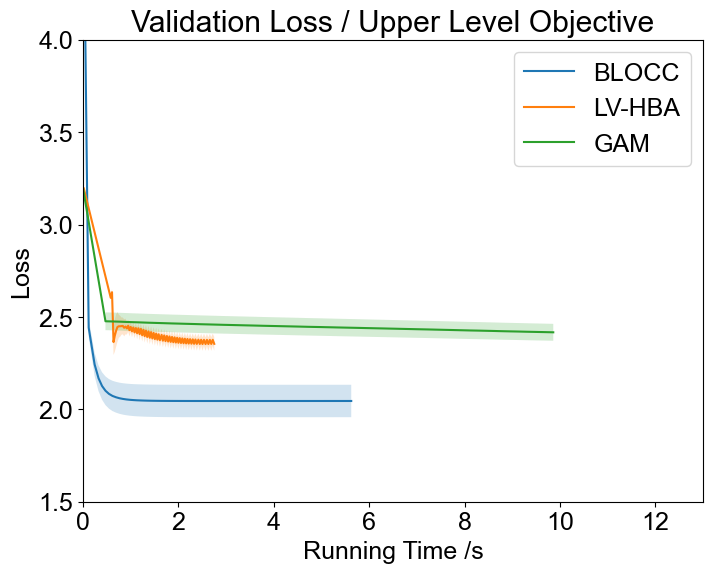

In [53]:
plt.figure(figsize=(8,6))

plt.plot(axis_ours,val_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = val_loss_ours.mean(0)-val_loss_ours.std(0)
fill_up_ours = val_loss_ours.mean(0)+val_loss_ours.std(0)
plt.fill_between(axis_ours[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(axis_lvhba,val_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = val_loss_lvhba.mean(0)-val_loss_lvhba.std(0)
fill_up_LV = val_loss_lvhba.mean(0)+val_loss_lvhba.std(0)
plt.fill_between(axis_lvhba[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(axis_gam,val_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = val_loss_ga.mean(0)-val_loss_ga.std(0)
fill_dn_GAM = val_loss_ga.mean(0)+val_loss_ga.std(0)
plt.fill_between(axis_gam[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Validation Loss / Upper Level Objective')
plt.xlabel('Running Time /s')
plt.ylabel("Loss")

plt.ylim([1.5,4])
plt.xlim([0,13])
plt.savefig(results_path + 'upper_obj_time.pdf', bbox_inches="tight")

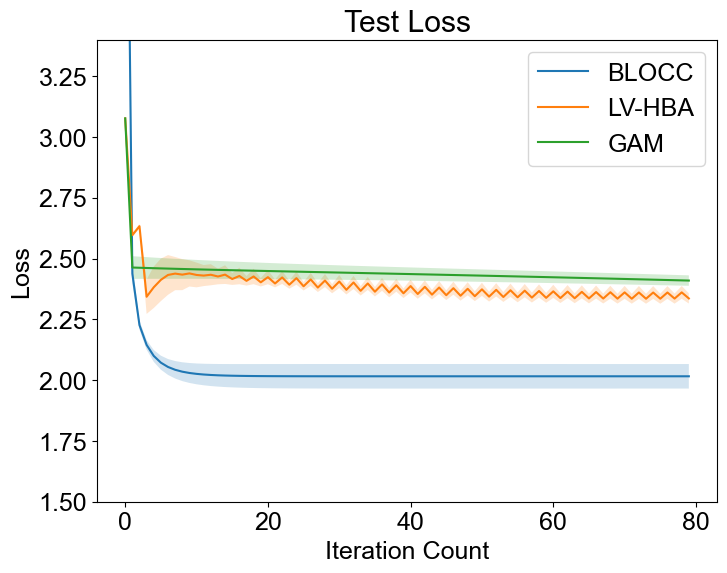

In [54]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis,test_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = test_loss_ours.mean(0)-test_loss_ours.std(0)
fill_up_ours = test_loss_ours.mean(0)+test_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours[1:],fill_up_ours[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = test_loss_lvhba.mean(0)-test_loss_lvhba.std(0)
fill_up_LV = test_loss_lvhba.mean(0)+test_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV[1:],fill_up_LV[1:],alpha=0.2)

plt.plot(iter_axis,test_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = test_loss_ga.mean(0)-test_loss_ga.std(0)
fill_dn_GAM = test_loss_ga.mean(0)+test_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM[1:],fill_up_GAM[1:],alpha=0.2)

plt.legend()
plt.title('Test Loss')
plt.xlabel('Iteration Count')
plt.ylabel("Loss")

plt.ylim([1.5,3.4])
plt.savefig(results_path + 'test_obj_iteration.pdf', bbox_inches="tight")

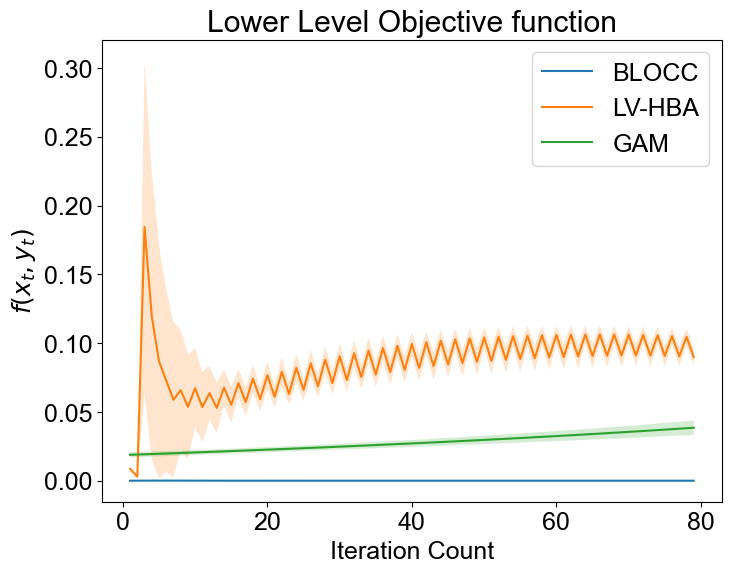

In [57]:
plt.figure(figsize=(8,6))

plt.plot(iter_axis[1:],lower_loss_ours.mean(0),'-',label="BLOCC")
fill_dn_ours = lower_loss_ours.mean(0)-lower_loss_ours.std(0)
fill_up_ours = lower_loss_ours.mean(0)+lower_loss_ours.std(0)
plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_lvhba.mean(0),'-',label="LV-HBA")
fill_dn_LV = lower_loss_lvhba.mean(0)-lower_loss_lvhba.std(0)
fill_up_LV = lower_loss_lvhba.mean(0)+lower_loss_lvhba.std(0)
plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

plt.plot(iter_axis[1:],lower_loss_ga.mean(0),'-',label="GAM")
fill_up_GAM = lower_loss_ga.mean(0)-lower_loss_ga.std(0)
fill_dn_GAM = lower_loss_ga.mean(0)+lower_loss_ga.std(0)
plt.fill_between(iter_axis[1:],fill_dn_GAM,fill_up_GAM,alpha=0.2)

plt.legend()
plt.title('Lower Level Objective function')
plt.xlabel('Iteration Count')
plt.ylabel("$f(x_t, y_t)$")

plt.savefig(results_path + 'lower_obj_iteration.pdf', bbox_inches="tight")

In [56]:
# plt.figure(figsize=(8,6))

# plt.plot(iter_axis[1:],constraint_violation_ours.mean(0),'-',label="BLOCC")
# # fill_dn_ours = constraint_violation_ours.mean(0)-constraint_violation_ours.std(0)
# # fill_up_ours = constraint_violation_ours.mean(0)+constraint_violation_ours.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_ours,fill_up_ours,alpha=0.2)

# plt.plot(iter_axis[1:],constraint_violation_lvhba.mean(0),'-',label="LV-HBA")
# # fill_dn_LV = constraint_violation_lvhba.mean(0)-constraint_violation_lvhba.std(0)
# # fill_up_LV = constraint_violation_lvhba.mean(0)+constraint_violation_lvhba.std(0)
# # plt.fill_between(iter_axis[1:],fill_dn_LV,fill_up_LV,alpha=0.2)

# plt.legend()
# # plt.title('Lower Loss')
# # plt.xlabel('Iteration Count')
# # plt.ylabel("Loss")

# plt.savefig(results_path + 'constraint_violation.pdf', bbox_inches="tight")

# Gamma Sensitivity Analysis

In [58]:
data = load_diabetes()
n_train = 500
n_val = 150

seeds = 5

In [59]:
import cvxpy as cp

def opt_ll(C, x_train, y_train):

    w_opt = cp.Variable(x_train.shape[1])
    b_opt = cp.Variable()
    xi_opt = cp.Variable(y_train.shape[0], nonneg=True)

    loss_lower =  0.5*cp.norm(w_opt, 2)**2

    constraints=[]
    for i in range(y_train.shape[0]):
        constraints.append(1 - xi_opt[i] - y_train[i] * (cp.scalar_product(w_opt, x_train[i])+b_opt) <= 0)

    constraints_xi = [xi_opt <= C]

    obj_lower = cp.Minimize(loss_lower)

    prob_lower = cp.Problem(obj_lower, constraints + constraints_xi)
    prob_lower.solve()

    return w_opt.value, b_opt.value, xi_opt.value

In [60]:
gamma_vals = np.logspace(-2, 2, 5)

opt_gaps = np.zeros((gamma_vals.shape[0], seeds))
upper_levels = np.zeros((gamma_vals.shape[0], seeds))
for i, gam in enumerate(gamma_vals):

    print(f"{i+1}/{gamma_vals.shape[0]} - Starting gamma: {gam}", flush=True)

    hparams['ours']['gam'] = gam

    for seed in range(seeds):
        x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)
        metrics_seed, variables_seed = ours(x_train, y_train, x_val, y_val, x_test, y_test, hparams['ours'], epochs, verbose=False)

        w_opt, b_opt, xi_opt = opt_ll(variables_seed[-1]['C'], x_train, y_train)
        opt_gaps[i, seed] += np.linalg.norm(variables_seed[-1]['w'].detach().numpy() - w_opt) + \
                       np.linalg.norm(variables_seed[-1]['b'].detach().numpy() - b_opt) + \
                       np.linalg.norm(variables_seed[-1]['xi'].detach().numpy() - xi_opt)
        
        upper_levels[i, seed] += metrics_seed[-1]['loss_upper']
        
    opt_gaps[i] /= seeds
    upper_levels[i] /= seeds

1/5 - Starting gamma: 0.01


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


2/5 - Starting gamma: 0.1
3/5 - Starting gamma: 1.0
4/5 - Starting gamma: 10.0
5/5 - Starting gamma: 100.0


Text(0.5, 0, '$\\gamma$')

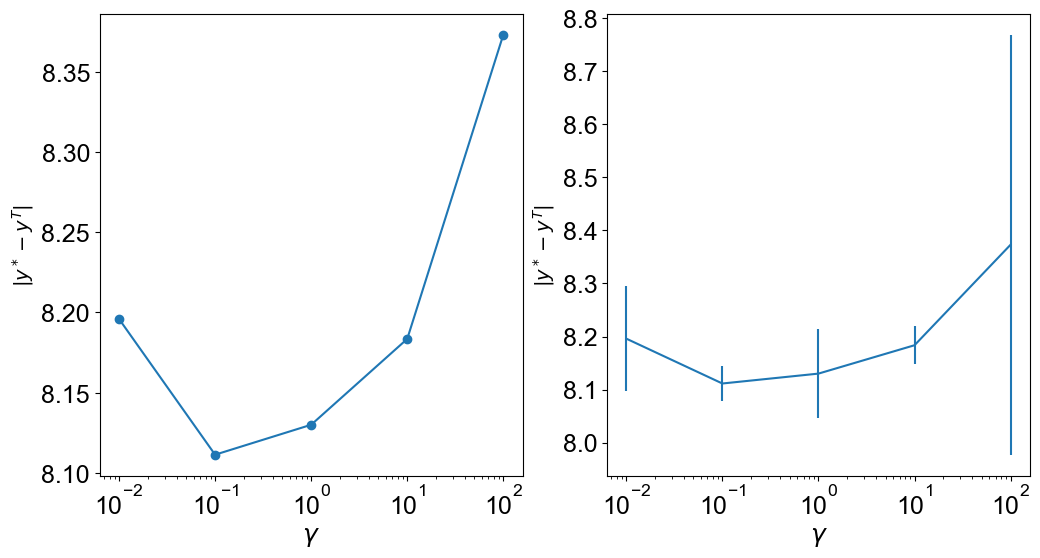

In [61]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].semilogx(gamma_vals, opt_gaps.mean(1), 'o-')
ax[0].set_ylabel("$|y^*-y^T|$", fontsize=14)
ax[0].set_xlabel("$\\gamma$", fontsize=18)

ax[1].errorbar(gamma_vals, opt_gaps.mean(1), yerr=opt_gaps.std(1))
ax[1].set_xscale('log')
ax[1].set_ylabel("$|y^*-y^T|$", fontsize=14)
ax[1].set_xlabel("$\\gamma$", fontsize=18)

Text(0.5, 0, '$\\gamma$')

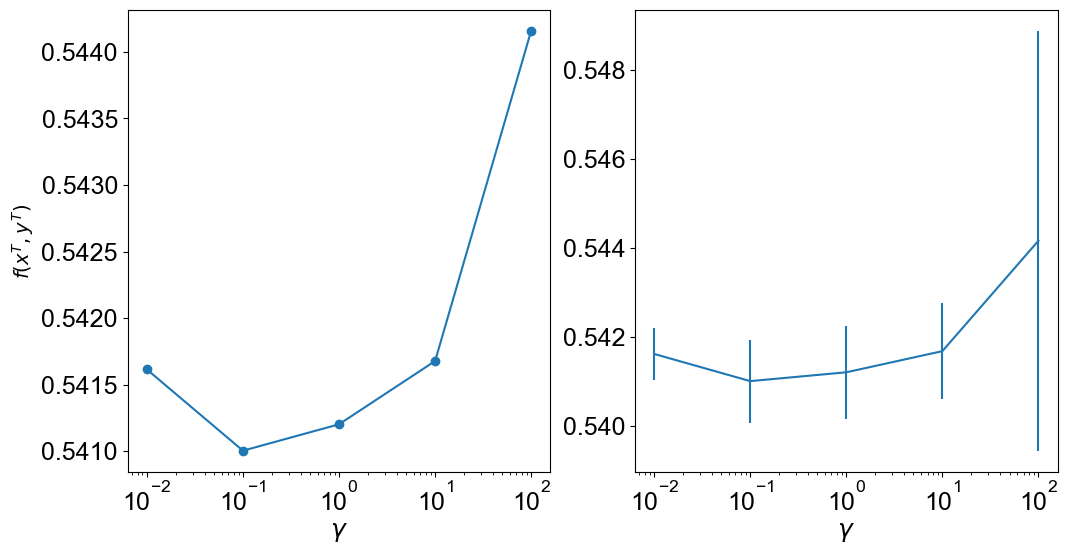

In [62]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].semilogx(gamma_vals, upper_levels.mean(1), 'o-')
ax[0].set_ylabel("$f(x^T, y^T)$", fontsize=14)
ax[0].set_xlabel("$\\gamma$", fontsize=18)

ax[1].errorbar(gamma_vals, upper_levels.mean(1), yerr=upper_levels.std(1))
ax[1].set_xscale('log')
#ax[1].set_ylabel("$f(x^T, y^T)$", fontsize=14)
ax[1].set_xlabel("$\\gamma$", fontsize=18)

# Measuring Convergence Time

In [6]:
n_train = 500
n_val = 150
seeds = 10
early_stopping_th = {'ours': 2e-2, 'lv_hba': 1e-4, 'gam': 1e-7}

algs = ['ours', 'lv_hba', 'gam']

In [7]:
metrics = {}
variables = {}

for dataset_name in ["diabetes", "fourclass"]:
    print(f"Starting {dataset_name}")
    data = eval("load_" + dataset_name)()

    metrics[dataset_name] = {}
    variables[dataset_name] = {}

    for a in algs:
        metrics[dataset_name][a] = []
        variables[dataset_name][a] = []

    for seed in range(seeds):

        print(f"Starting seed {seed+1}/{seeds}: ", end="")

        x_train, y_train, x_val, y_val, x_test, y_test = train_val_test_split(data, seed, n_train, n_val)

        for alg in algs:
            print(f"{alg}", end=" ")

            metrics_seed, variables_seed = eval(alg)(x_train, y_train, x_val, y_val, x_test, y_test, hparams[alg], epochs, early_stopping_th=early_stopping_th[alg], verbose=False)
            metrics[dataset_name][alg].append(metrics_seed)
            variables[dataset_name][alg].append(variables_seed)
        print("DONE")

Starting diabetes
Starting seed 1/10: ours lv_hba gam DONE
Starting seed 2/10: ours lv_hba gam DONE
Starting seed 3/10: ours lv_hba gam DONE
Starting seed 4/10: ours lv_hba gam DONE
Starting seed 5/10: ours lv_hba gam DONE
Starting seed 6/10: ours lv_hba gam DONE
Starting seed 7/10: ours lv_hba gam DONE
Starting seed 8/10: ours lv_hba gam DONE
Starting seed 9/10: ours lv_hba gam DONE
Starting seed 10/10: ours lv_hba gam DONE
Starting fourclass
Starting seed 1/10: ours lv_hba gam DONE
Starting seed 2/10: ours lv_hba gam DONE
Starting seed 3/10: ours lv_hba gam DONE
Starting seed 4/10: ours lv_hba gam DONE
Starting seed 5/10: ours lv_hba gam DONE
Starting seed 6/10: ours lv_hba gam DONE
Starting seed 7/10: ours lv_hba gam DONE
Starting seed 8/10: ours lv_hba gam DONE
Starting seed 9/10: ours lv_hba gam DONE
Starting seed 10/10: ours lv_hba gam DONE


In [8]:
[len(metrics['diabetes']['gam'][i]) for i in range(4)]

[80, 80, 80, 80]

In [9]:
[len(metrics['diabetes']['ours'][i]) for i in range(10)], [len(metrics['diabetes']['lv_hba'][i]) for i in range(10)], [len(metrics['diabetes']['gam'][i]) for i in range(10)]

([80, 80, 80, 80, 80, 80, 80, 80, 80, 80],
 [80, 80, 80, 80, 80, 80, 80, 80, 80, 80],
 [80, 80, 80, 80, 80, 80, 80, 80, 80, 80])

In [10]:
np.mean([metrics['diabetes']['ours'][i][-1]['time_computation'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['time_computation'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['time_computation'] for i in range(10)])

(5.921740317344666, 4.766185760498047, 12.458284926414489)

In [11]:
np.mean([metrics['diabetes']['ours'][i][-1]['test_acc_F'] for i in range(10)]), np.mean([metrics['diabetes']['lv_hba'][i][-1]['test_acc'] for i in range(10)]),np.mean([metrics['diabetes']['gam'][i][-1]['test_acc'] for i in range(10)])

(0.7644068, 0.7610169491525425, 0.729661)